In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("Hitters.csv").dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  263 non-null    object 
 1   AtBat       263 non-null    int64  
 2   Hits        263 non-null    int64  
 3   HmRun       263 non-null    int64  
 4   Runs        263 non-null    int64  
 5   RBI         263 non-null    int64  
 6   Walks       263 non-null    int64  
 7   Years       263 non-null    int64  
 8   CAtBat      263 non-null    int64  
 9   CHits       263 non-null    int64  
 10  CHmRun      263 non-null    int64  
 11  CRuns       263 non-null    int64  
 12  CRBI        263 non-null    int64  
 13  CWalks      263 non-null    int64  
 14  League      263 non-null    object 
 15  Division    263 non-null    object 
 16  PutOuts     263 non-null    int64  
 17  Assists     263 non-null    int64  
 18  Errors      263 non-null    int64  
 19  Salary      263 non-null    f

In [3]:
x = data.drop(["Unnamed: 0", "League", "Division", "NewLeague", "Salary"], axis=1)
y = data.Salary

In [4]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   AtBat    263 non-null    int64
 1   Hits     263 non-null    int64
 2   HmRun    263 non-null    int64
 3   Runs     263 non-null    int64
 4   RBI      263 non-null    int64
 5   Walks    263 non-null    int64
 6   Years    263 non-null    int64
 7   CAtBat   263 non-null    int64
 8   CHits    263 non-null    int64
 9   CHmRun   263 non-null    int64
 10  CRuns    263 non-null    int64
 11  CRBI     263 non-null    int64
 12  CWalks   263 non-null    int64
 13  PutOuts  263 non-null    int64
 14  Assists  263 non-null    int64
 15  Errors   263 non-null    int64
dtypes: int64(16)
memory usage: 34.9 KB


# Lasso 

Text(0, 0.5, 'weights')

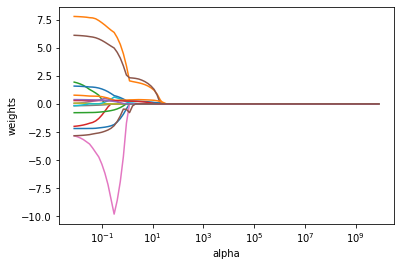

In [5]:
alphas = 10**np.linspace(10,-2,100)*0.4

lasso = Lasso(max_iter = 10000, normalize = True)
coEffients= []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x, y)
    coEffients.append(lasso.coef_)
    
fig1 = plt.gca()
fig1.plot(alphas*2,coEffients)
fig1.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [6]:
lasso2 = Lasso(alpha = 10, max_iter = 10000, normalize = True).fit(x,y)
print(pd.Series(lasso2.coef_, index=x.columns))

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64


We can see that the last three predictors are "Hits, CRuns, CRBI".


## Again with CV

In [7]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(scale(x),y)

lassocv.alpha_


0.0635481759985745

So the optimal value of the penalty is 0.063

In [8]:
model3 = Lasso(alpha=lassocv.alpha_,max_iter = 100000, normalize = True).fit(x, y)
print(pd.Series(model3.coef_, index=x.columns))

AtBat     -2.082954
Hits       7.041011
HmRun      0.000000
Runs      -0.682615
RBI        0.496552
Walks      5.511781
Years     -6.107625
CAtBat    -0.087066
CHits      0.000000
CHmRun     0.156468
CRuns      1.228061
CRBI       0.583821
CWalks    -0.690601
PutOuts    0.292694
Assists    0.304372
Errors    -2.450795
dtype: float64


As we can see, there are 16 entres but 2 of them are zeros. So only 14 predictors left

# Again with Ridge

Text(0.5, 1.0, 'Ridge Coefficients Trajectory')

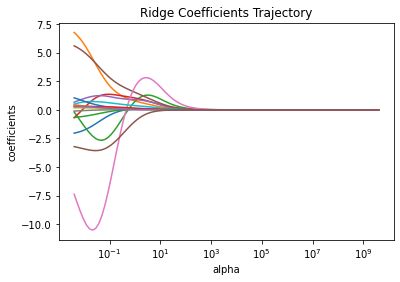

In [9]:
coEffients=[]

for a in alphas:
    ridge=Ridge(alpha = a,normalize=True)
    ridge.fit(x, y)
    coEffients.append(ridge.coef_)
    
fig2 = plt.gca()
fig2.plot(alphas, coEffients)
fig2.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge Coefficients Trajectory')

In [10]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(scale(x),y)
ridgecv.alpha_

0.01221542203533365

The optimal value of the regularization penalty are 0.0122 now 


# Short Answer

Bias and variance trade-off means that the ideal model with low bias and low variance is hard to accomplish. Bias and variance are contricicting each other so that we can only try to find a balance between them.


In the Lasso example, the regularizition reduced the number of the predictors by removing irrelevant features in the data. This process increase the bias but rudeced the variance of the data.


As we can see in problem 1, the larger the coefficients, the smaller the penalty value. In the case of low penalty value, the variance of the model is higher and we are facing the overfitting problem. On the other hand, when we have high penalty value, the bias become higher and we mgiht face underfitting.